In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [6]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v9_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

In [7]:
len(os.listdir(saved_models_dir))

72

In [8]:
all_configs = []
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
})
all_configs.append({
    "diversity_loss_coef": 7.5,
    "entropy_loss_coef": 7.5,
})
# all_configs.append({
#     "diversity_loss_coef": 5.0,
#     "entropy_loss_coef": 1.0,
# })
# all_configs.append({
#     "diversity_loss_coef": 7.5,
#     "entropy_loss_coef": 1.0,
# })

In [9]:
all_predicted_exps = {}
all_predicted_exps["designed_for"] = []
all_predicted_exps["sequence"] = []
all_predicted_exps["design_model"] = []
all_predicted_exps["diversity_loss_coef"] = []
all_predicted_exps["entropy_loss_coef"] = []

for cell in ["THP1", "Jurkat", "K562"]:
    all_predicted_exps[cell] = []

for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_final"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}"
            
            print(experiment_id)
            
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences_predicted_exps = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            final_sequences = np.argmax(final_sequences, axis=-1)
            final_sequences = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_sequences)
            
            all_predicted_exps["designed_for"].extend([cell]*len(final_sequences_predicted_exps))
            all_predicted_exps["sequence"].extend(final_sequences)
            all_predicted_exps["design_model"].extend([model]*len(final_sequences_predicted_exps))
            all_predicted_exps["diversity_loss_coef"].extend([diversity_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["entropy_loss_coef"].extend([entropy_loss_coef]*len(final_sequences_predicted_exps))
            
            for i, exp_cell in enumerate(["THP1", "Jurkat", "K562"]):
                all_predicted_exps[exp_cell].extend(final_sequences_predicted_exps[:, i])
                
all_predicted_exps = pd.DataFrame(all_predicted_exps)

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
THP1_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_7.5_ent_coef_7.5
Jurkat_using_coms_0.003_THP1_weigh

In [10]:
all_predicted_exps["sequence"] = all_predicted_exps.apply(lambda x: "".join(x["sequence"]), axis=1)

In [11]:
all_predicted_exps

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562
0,THP1,TTTTCCGCTTCTCTCTCTCTCTCTCTCGTCGGCCGGCGGCGCGACG...,coms_0.0003_THP1_weight_1.5.pkl,5.0,5.0,3.272178,3.046082,2.384452
1,THP1,GCGCCGCGCCGCGCGCCGCGGCGCCGCGGCGCGGGGCGGCGCGACG...,coms_0.0003_THP1_weight_1.5.pkl,5.0,5.0,3.291288,3.123613,2.471539
2,THP1,CAAAAAACACAACACAACACAAAAAACAAGGACTCCTCTTTTCTTT...,coms_0.0003_THP1_weight_1.5.pkl,5.0,5.0,0.292144,-0.438504,-0.536112
3,THP1,GCTGCGGCGTCTCTCTCTCTCTCTCTCTCTCTCTCGCGTCGCCGCC...,coms_0.0003_THP1_weight_1.5.pkl,5.0,5.0,3.340868,2.985645,2.385771
4,THP1,GCTGCCGCTTCTCTTTCTCTCTCTCTCCTCGCGCGGCGGCGCGAGG...,coms_0.0003_THP1_weight_1.5.pkl,5.0,5.0,3.116712,2.820812,2.209628
...,...,...,...,...,...,...,...,...
179995,K562,GGCCCGCCCCGACACATATATATCTCTCCCCACCCGAGATCCCAGA...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,0.487257,0.360754,2.223747
179996,K562,GGCCCGGACCGGCCGGGAGTGGGTCGGTACGGGACGGGGATTGGAC...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,0.175144,0.555116,0.765268
179997,K562,TAAATAAAATAAAAAAAAATAAACCAAACCTAAACGCAAATTTAAT...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,1.054241,1.538462,3.302414
179998,K562,TAAATATAATAAAAAAAAATAAACCAACCCGCAGTGCAACGTTCAA...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,0.794624,1.188334,3.164850


THP1


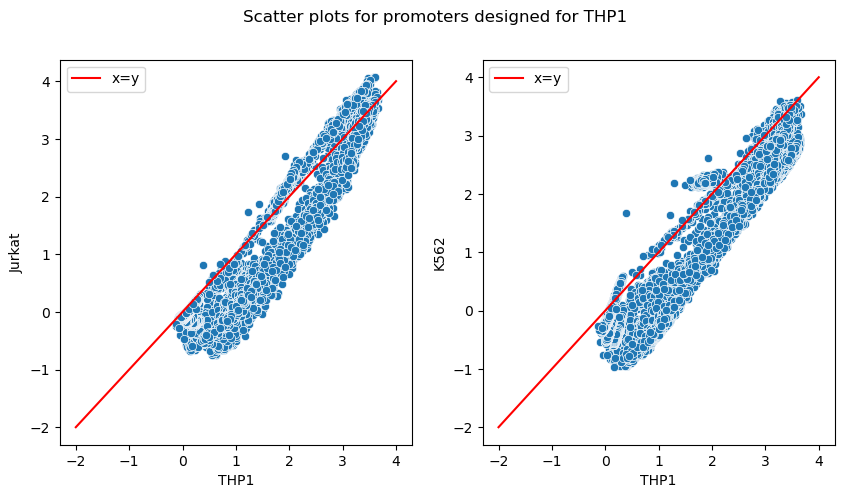

Jurkat


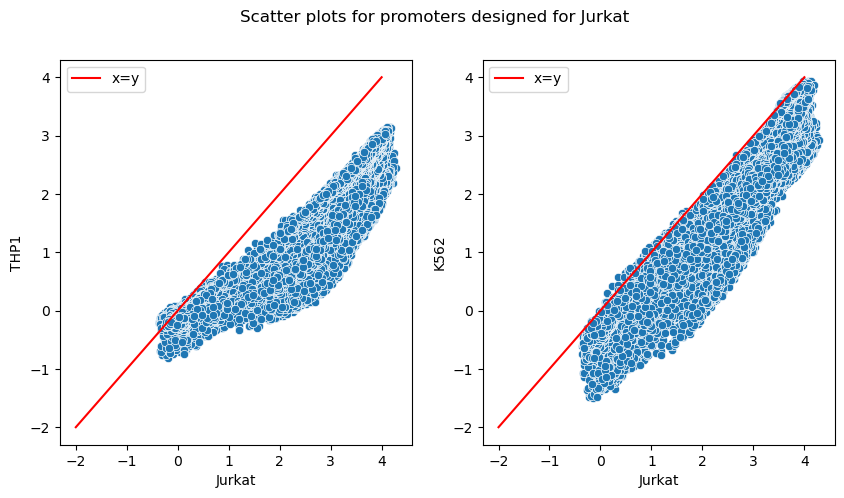

K562


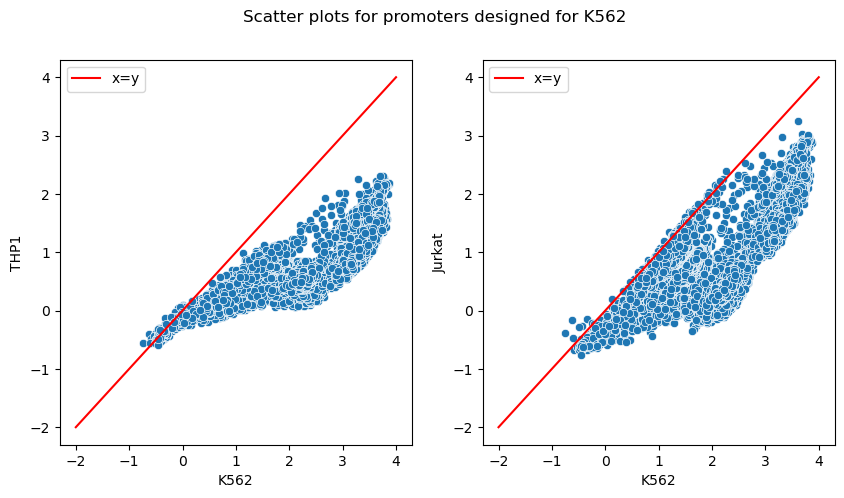

In [12]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

In [9]:
# for cell in ["THP1", "Jurkat", "K562"]:
cell = "THP1"
print(cell)
other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

seqs_designed_for_cell = all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True)
seqs_designed_for_cell["max_diff"] = seqs_designed_for_cell[cell] - np.max(seqs_designed_for_cell[other_cells], axis=1)
seqs_designed_for_cell = seqs_designed_for_cell.sort_values(by="max_diff", ascending=False)

THP1


In [10]:
seqs_designed_for_cell

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562,max_diff
104794,THP1,ACAGAGAACACAAGAAACCAAGAACCCAACATCCTCTTCTCCTCTT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,1.000478,-0.448550,-0.407415,1.407893
100434,THP1,ACAGAGAAGCCAAGAAGCCAAGAACCCAACATCCTCTTCTCCTCTC...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,0.801539,-0.594799,-0.608166,1.396338
114120,THP1,AAGAAGAAAAGGAAGCAAAAGGAAGCTCCAGGAACCATGAACCAGG...,coms_0.0_THP1_weight_1.5.pkl,5.0,1.0,0.979672,-0.429796,-0.411381,1.391053
100925,THP1,ACAGACAACACAACAACCCCACCTCCTCTCCTCCTCTTCTCCTCTT...,coms_0.0_THP1_weight_1.5.pkl,5.0,5.0,0.761296,-0.628738,-0.642359,1.390034
18041,THP1,AGAGGAAGCACGAAGAACCAGGAAGACGAAGCAGGATCCAAGGACC...,coms_0.0003_THP1_weight_1.5.pkl,7.5,1.0,1.299827,-0.326865,-0.090161,1.389987
...,...,...,...,...,...,...,...,...,...
14918,THP1,ACGGTTCTCTCTTTCCCCCCGAAGCGGAAGCGGAAGCCGGGAAGCG...,coms_0.0003_THP1_weight_1.5.pkl,5.0,1.0,2.437978,2.486836,3.183933,-0.745956
11263,THP1,AAGGACCGGAAACCGGAGTCGAAGCGGAACCGGAAGCGGAAGAGGG...,coms_0.0003_THP1_weight_1.5.pkl,5.0,1.0,2.542205,2.506716,3.303746,-0.761541
105853,THP1,TGGTCGTCTTCTCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,1.923326,2.703104,2.620385,-0.779778
108896,THP1,TGGCCGTCCTCTCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_THP1_weight_1.5.pkl,7.5,7.5,1.293041,1.370440,2.191208,-0.898166


In [11]:
all_predicted_exps.to_parquet(os.path.join(jax_data_dir, "final_sequences_v9.parquet"), index=False)